## Lead Scoring Case Study 

#### Problem Statement :

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 


The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, we need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

main objective is to idenify the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



**Data**

We have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. We can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that we also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.


**Goals of the Case Study**

There are quite a few goals for this case study.

To Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which our model should be able to adjust to if the company's requirement changes in the future so we will need to handle these as well. 




## Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats
%matplotlib inline

In [3]:
# Importing dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the Dataframe 

In [4]:
# Checking the dimensions of the dataframe
leads.shape

(9240, 37)

In [5]:
# Looking at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Handling the "Select" level that is present in many of the categorical variables
leads.replace({'Select': None},inplace = True)

In [8]:
#checking missing values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#Storing the data in another dataframe before starting data cleaning
leads_data = leads

## Data Cleaning 

In [10]:
#Checking the percentage of null values in leads data columns
perc_null = leads_data.isnull().sum()/len(leads_data)*100
perc_null.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

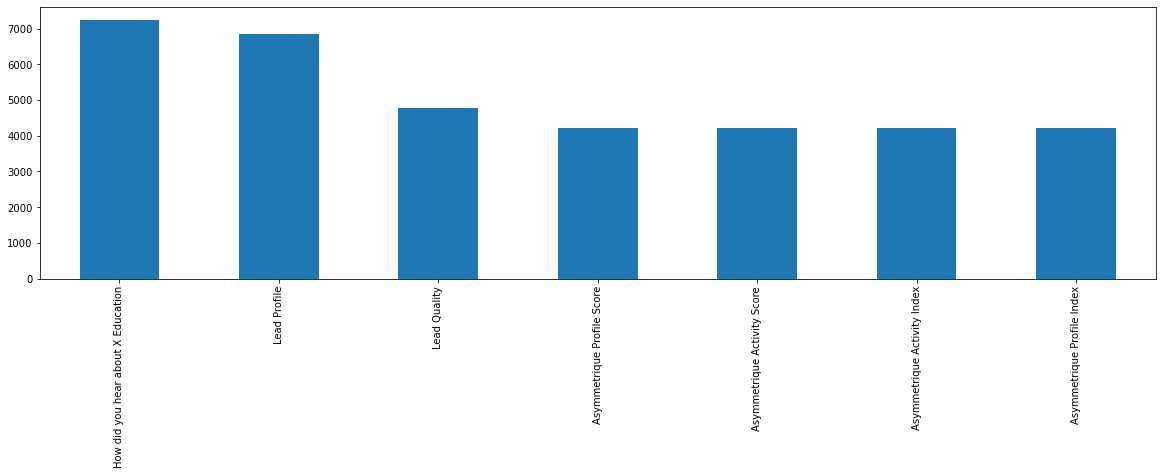

In [11]:
#to decide the cutoff percentage of null value for insignificant columns where client didn't respond any values
#bar chart plotted for list of columns where null values are greater than 40% 
Null_col = leads_data.isnull().sum().sort_values(ascending=False)
Null_col_40perc = Null_col[Null_col.values>40/100*len(leads_data)]
len(Null_col_40perc)

plt.figure(figsize=(20,5))
Null_col_40perc.plot(kind='bar')
plt.show()

In [12]:
#Dropping the insignificant columns with more than 40% Null Values 
leads_data=leads_data.drop(labels=list(Null_col_40perc.index),axis=1,inplace=False)
leads_data.shape


(9240, 30)

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,None,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,None,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [14]:
# Numerical columns
leads_data.describe().columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [15]:
# Categorical columns

list(set(leads_data.columns) - set(leads_data.describe().columns))

['Lead Source',
 'Lead Origin',
 'Do Not Email',
 'Country',
 'Magazine',
 'Last Notable Activity',
 'Tags',
 'Last Activity',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Prospect ID',
 'Update me on Supply Chain Content',
 'Newspaper Article',
 'Get updates on DM Content',
 'Search',
 'What is your current occupation',
 'Receive More Updates About Our Courses',
 'Specialization',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Newspaper',
 'I agree to pay the amount through cheque',
 'Digital Advertisement',
 'X Education Forums',
 'City']

In [16]:
#Country missing value imputation

leads_data.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Canada                     4
Germany                    4
Sweden                     3
Uganda                     2
Netherlands                2
Asia/Pacific Region        2
China                      2
Ghana                      2
Philippines                2
Belgium                    2
Bangladesh                 2
Italy                      2
Indonesia                  1
Kenya                      1
Malaysia                   1
Denmark                    1
Liberia                    1
Sri Lanka                  1
Russia        

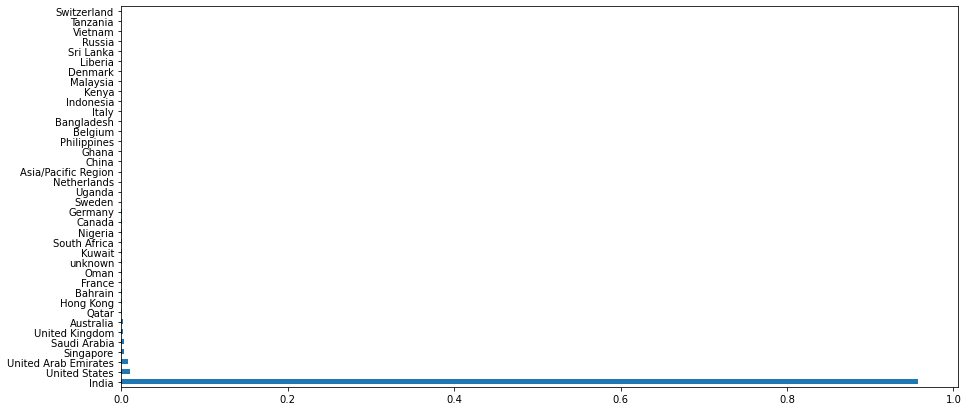

In [17]:
plt.figure(figsize=[15,7])
leads_data.Country.value_counts(normalize=True).plot.barh()
plt.show()

In [18]:
#County column is heavily skewed and imbalanced. We can drop this column
leads_data=leads_data.drop(labels='Country',axis=1,inplace=False)

In [19]:
#"What matters most to you in choosing a course" missing value imputation

leads_data["What matters most to you in choosing a course"].value_counts()


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
#"What matters most to you in choosing a course" column is heavily skewed and imbalanced. We can drop this column
leads_data=leads_data.drop(labels="What matters most to you in choosing a course",axis=1,inplace=False)

In [21]:
#"Specialization" missing value imputation

leads_data["Specialization"].value_counts()


Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

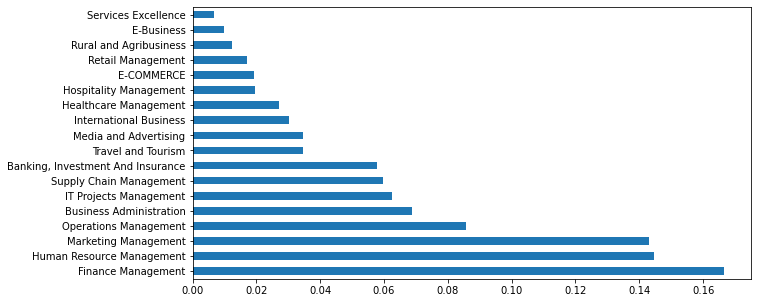

In [22]:
plt.figure(figsize=[10,5])
leads_data.Specialization.value_counts(normalize=True).plot.barh()
plt.show()

In [23]:
print(leads_data.Specialization.mode())

0    Finance Management
dtype: object


In [24]:
#Instead of replacing with mode Finance Management its better  to drop the rows with missing values
leads_data = leads_data.dropna(subset=['Specialization'])

In [25]:
#'Lead Source' missing value imputation

leads_data['Lead Source'].value_counts()

Direct Traffic       2381
Google               1969
Organic Search        787
Reference             390
Olark Chat            242
Referral Sites         35
Facebook               16
Welingak Website       15
Click2call              4
Press_Release           2
bing                    2
Social Media            2
youtubechannel          1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

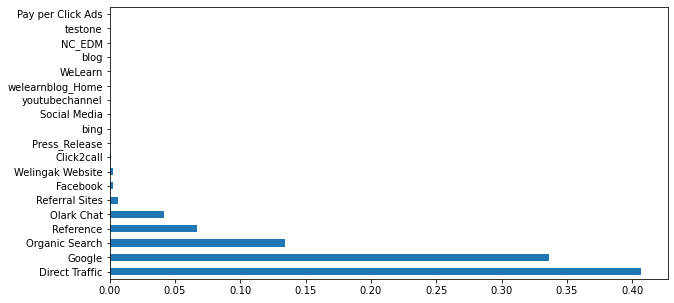

In [26]:
plt.figure(figsize=[10,5])
leads_data['Lead Source'].value_counts(normalize=True).plot.barh()
plt.show()

In [27]:
#Combining all minor leads sources into "Others"
leads_data = leads_data.replace({"Lead Source": {"Pay per Click Ads": "Others", "testone": "Others", "welearnblog_Home": "Others", "youtubechannel": "Others", "NC_EDM": "Others", "WeLearn": "Others", "blog":"Others", "Press_Release":"Others", "bing":"Others", "Social Media":"Others", "Click2call":"Others", "Welingak Website":"Others", "Facebook":"Others", "Referral Sites":"Others"}})

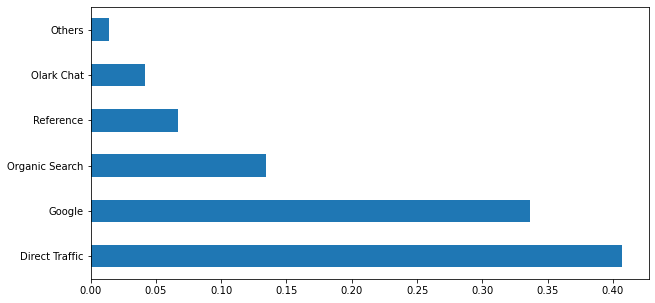

In [28]:
plt.figure(figsize=[10,5])
leads_data['Lead Source'].value_counts(normalize=True).plot.barh()
plt.show()

In [29]:
#Handling the missing value in the Lead Source
leads_data['Lead Source'].fillna('Others',inplace = True)

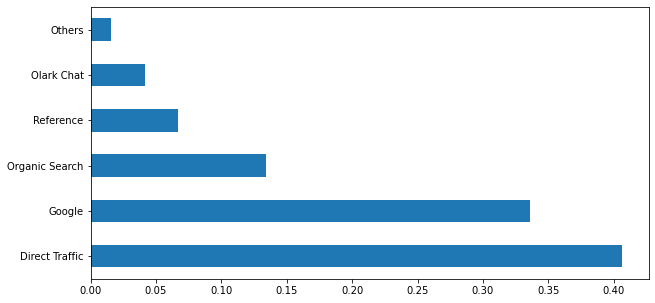

In [30]:
plt.figure(figsize=[10,5])
leads_data['Lead Source'].value_counts(normalize=True).plot.barh()
plt.show()

In [31]:
# Checking Tags column created by Sales team

leads_data['Tags'].value_counts()

Will revert after reading the email                  1778
Ringing                                               873
Already a student                                     284
Interested in other courses                           267
Closed by Horizzon                                    262
switched off                                          180
Busy                                                  158
Lost to EINS                                          137
Not doing further education                           111
Interested  in full time MBA                           83
Graduation in progress                                 73
invalid number                                         67
Diploma holder (Not Eligible)                          43
wrong number given                                     37
opp hangup                                             27
number not provided                                    21
Lost to Others                                          7
in touch with 

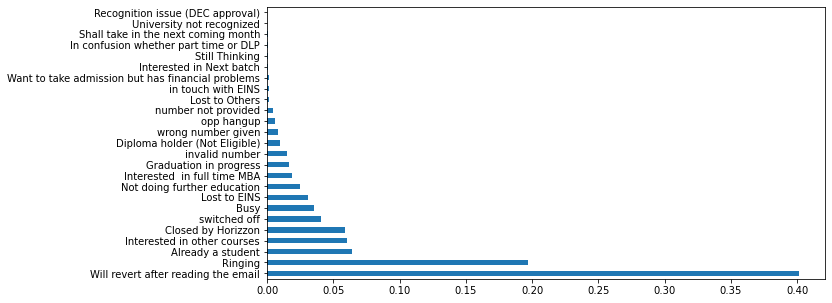

In [32]:
plt.figure(figsize=[10,5])
leads_data['Tags'].value_counts(normalize=True).plot.barh()
plt.show()

In [33]:
#Dropping the column Tags as it was created by Sales team after identifying and connecting with previous potential leads
leads_data=leads_data.drop(labels='Tags',axis=1,inplace=False)

In [34]:
# Checking 'Last Notable Activity' column created by Sales team

leads_data['Last Notable Activity'].value_counts()

Email Opened                    1975
Modified                        1857
SMS Sent                        1546
Page Visited on Website          235
Email Link Clicked               100
Olark Chat Conversation           35
Unsubscribed                      34
Email Bounced                     33
Unreachable                       26
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

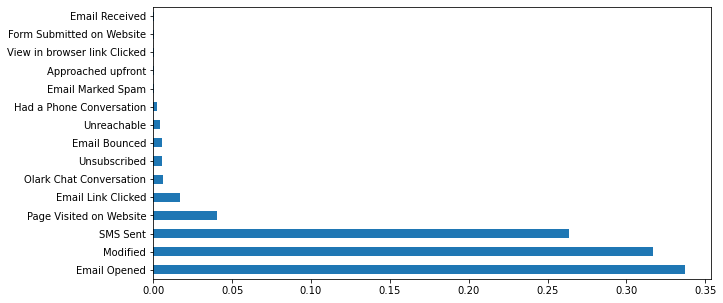

In [35]:
plt.figure(figsize=[10,5])
leads_data['Last Notable Activity'].value_counts(normalize=True).plot.barh()
plt.show()

In [36]:
#Dropping the column Last Notable Activity as it was created by Sales team after identifying and connecting with previous potential leads
leads_data=leads_data.drop(labels='Last Notable Activity',axis=1,inplace=False)

In [37]:
# Checking 'Last Activity' column created by Sales team

leads_data['Last Activity'].value_counts()

Email Opened                    2345
SMS Sent                        1938
Page Visited on Website          488
Converted to Lead                267
Email Bounced                    210
Email Link Clicked               150
Olark Chat Conversation          146
Form Submitted on Website        114
Unreachable                       73
Unsubscribed                      45
Had a Phone Conversation          24
Approached upfront                 3
View in browser link Clicked       3
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

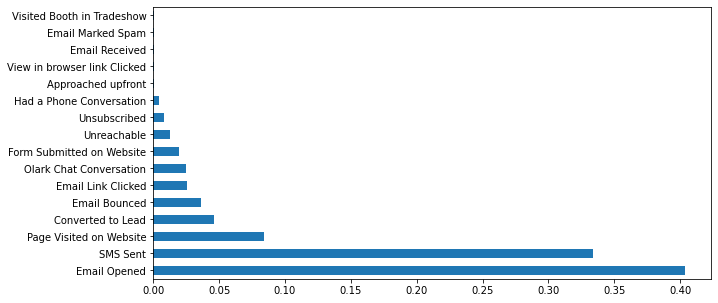

In [38]:
plt.figure(figsize=[10,5])
leads_data['Last Activity'].value_counts(normalize=True).plot.barh()
plt.show()

In [39]:
#Dropping the column Last Activity as it was created by Sales team after identifying and connecting with previous potential leads
leads_data=leads_data.drop(labels='Last Activity',axis=1,inplace=False)

In [40]:
#'What is your current occupation' missing value imputation

leads_data['What is your current occupation'].value_counts()

Unemployed              3772
Working Professional     675
Student                  125
Other                     15
Housewife                 10
Businessman                6
Name: What is your current occupation, dtype: int64

In [41]:
#Combining all minor current occupation types into "Others"
leads_data = leads_data.replace({"What is your current occupation": {"Businessman": "Others", "Housewife": "Others", "Other": "Others"}})

In [42]:
#Handling the missing value in the Occupation type
leads_data['What is your current occupation'].fillna(leads_data['What is your current occupation'].mode()[0],inplace = True)

In [43]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5029
Working Professional     675
Student                  125
Others                    31
Name: What is your current occupation, dtype: int64

In [44]:
#Country missing value imputation

leads_data.City.value_counts()

Mumbai                         3121
Thane & Outskirts               721
Other Cities                    657
Other Cities of Maharashtra     428
Other Metro Cities              373
Tier II Cities                   74
Name: City, dtype: int64

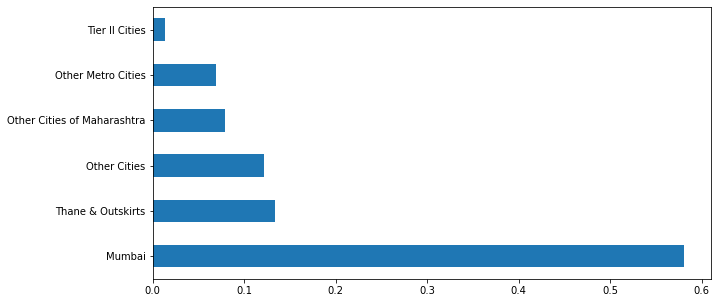

In [45]:
plt.figure(figsize=[10,5])
leads_data['City'].value_counts(normalize=True).plot.barh()
plt.show()

In [46]:
#Combining all minor Cities into "Other_City"
leads_data = leads_data.replace({"City": {"Other Cities": "Other_City", "Other Cities of Maharashtra": "Other_City", "Other Metro Cities": "Other_City", "Tier II Cities": "Other_City"}})

In [47]:
#Handling the missing value in the City
leads_data['City'].fillna(leads_data['City'].mode()[0],inplace = True)

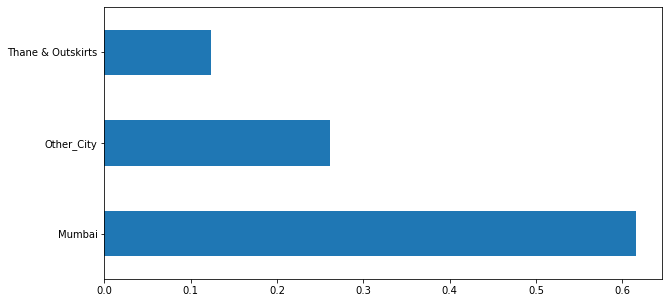

In [48]:
plt.figure(figsize=[10,5])
leads_data['City'].value_counts(normalize=True).plot.barh()
plt.show()

In [49]:
#TotalVisits missing value imputation

leads_data.TotalVisits.describe()

count    5799.000000
mean        4.378169
std         5.361246
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

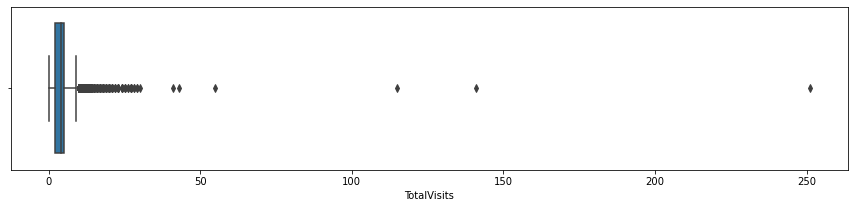

In [50]:
#boxplot of TotalVisits
plt.figure(figsize=[15,3])
sns.boxplot(leads_data.TotalVisits)
plt.show()

In [51]:
#Handling the missing value in the TotalVisits
leads_data['TotalVisits'].fillna(leads_data['TotalVisits'].median(),inplace = True)

In [52]:
#Page Views Per Visit missing value imputation

leads_data["Page Views Per Visit"].describe()

count    5799.000000
mean        3.023773
std         2.105207
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

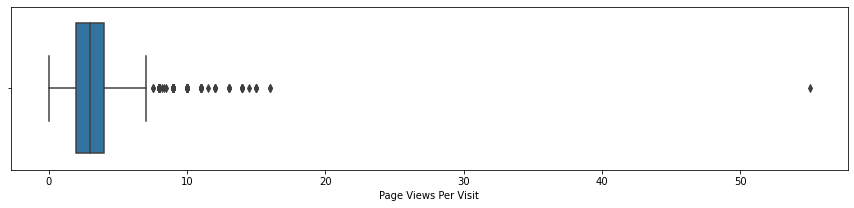

In [53]:
#boxplot of Page Views Per Visit
plt.figure(figsize=[15,3])
sns.boxplot(leads_data["Page Views Per Visit"])
plt.show()

In [54]:
#Handling the missing value in the Page Views Per Visit
leads_data['Page Views Per Visit'].fillna(leads_data['Page Views Per Visit'].median(),inplace = True)

In [55]:
#Checking and droping duplicated records if any
leads_data = leads_data.drop_duplicates()

In [56]:
#modifying datatype of TotalVisits from float64 to int32
leads_data.TotalVisits = leads_data.TotalVisits.astype(int)

In [57]:
#modifying datatype of Page Views Per Visit from float64 to int32
leads_data["Page Views Per Visit"] = leads_data["Page Views Per Visit"].astype(int)

#### Checking for Outliers

In [58]:
# Checking for outliers in the continuous variables
num_leads = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [59]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99, .995])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5860.000000,5860.000000,5860.000000
mean,4.374232,607.197782,2.941638
std,5.333402,556.198478,2.122307
min,0.000000,0.000000,0.000000
25%,2.000000,132.750000,2.000000
50%,4.000000,369.500000,3.000000
75%,5.000000,1087.250000,4.000000
90%,8.000000,1450.000000,5.000000
95%,11.000000,1614.200000,7.000000
99%,18.000000,1873.410000,10.000000


In [60]:
#Removing the outliers
leads_data = leads_data[leads_data.TotalVisits < np.percentile(leads_data.TotalVisits,99.5)]

In [61]:
#checking the numerical datas again
leads_data.describe(percentiles=[.25, .5, .75, .90, .95, .99, .995])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000
mean,616290.960549,0.442539,4.180103,607.845969,2.923499
std,23068.350004,0.496730,3.162085,556.496172,1.995014
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596154.750000,0.000000,2.000000,132.000000,2.000000
50%,614083.500000,0.000000,4.000000,370.500000,3.000000
75%,636074.500000,1.000000,5.000000,1089.000000,4.000000
90%,649023.500000,1.000000,8.000000,1450.000000,5.000000
95%,654816.150000,1.000000,10.000000,1616.200000,6.000000
99%,659577.650000,1.000000,16.000000,1873.710000,9.710000


In [62]:
#Checking the percentage of rows retained in data cleaning process
len(leads_data)/len(leads)*100

63.095238095238095

## Data Preparation

In [63]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000
mean,616290.960549,0.442539,4.180103,607.845969,2.923499
std,23068.350004,0.496730,3.162085,556.496172,1.995014
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596154.750000,0.000000,2.000000,132.000000,2.000000
50%,614083.500000,0.000000,4.000000,370.500000,3.000000
75%,636074.500000,1.000000,5.000000,1089.000000,4.000000
max,660727.000000,1.000000,22.000000,2272.000000,16.000000


### Checking for imbalance in Converted TARGET 

In [64]:
leads_data.Converted.value_counts(normalize=True)*100

0    55.746141
1    44.253859
Name: Converted, dtype: float64

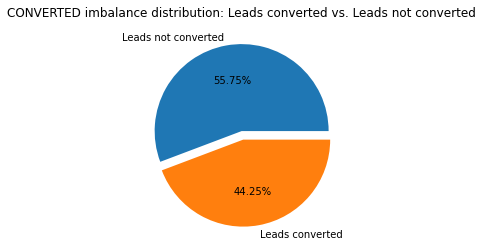

In [65]:
plt.pie(leads_data.Converted.value_counts(normalize=True)*100, labels=['Leads not converted','Leads converted'],explode=(0,0.1),autopct='%1.2f%%')
plt.title('CONVERTED imbalance distribution: Leads converted vs. Leads not converted')
plt.show()

In [66]:
#55.77% of target variables are not converted

In [67]:
#Splitting the leads dataframe leads_data into two parts based upon Converted value
t0 = leads_data.loc[leads_data.Converted == 0] #dataframe with leads not converted
t1 = leads_data.loc[leads_data.Converted == 1] #dataframe with leads converted

### Univariate Analysis of Numerical Variables 

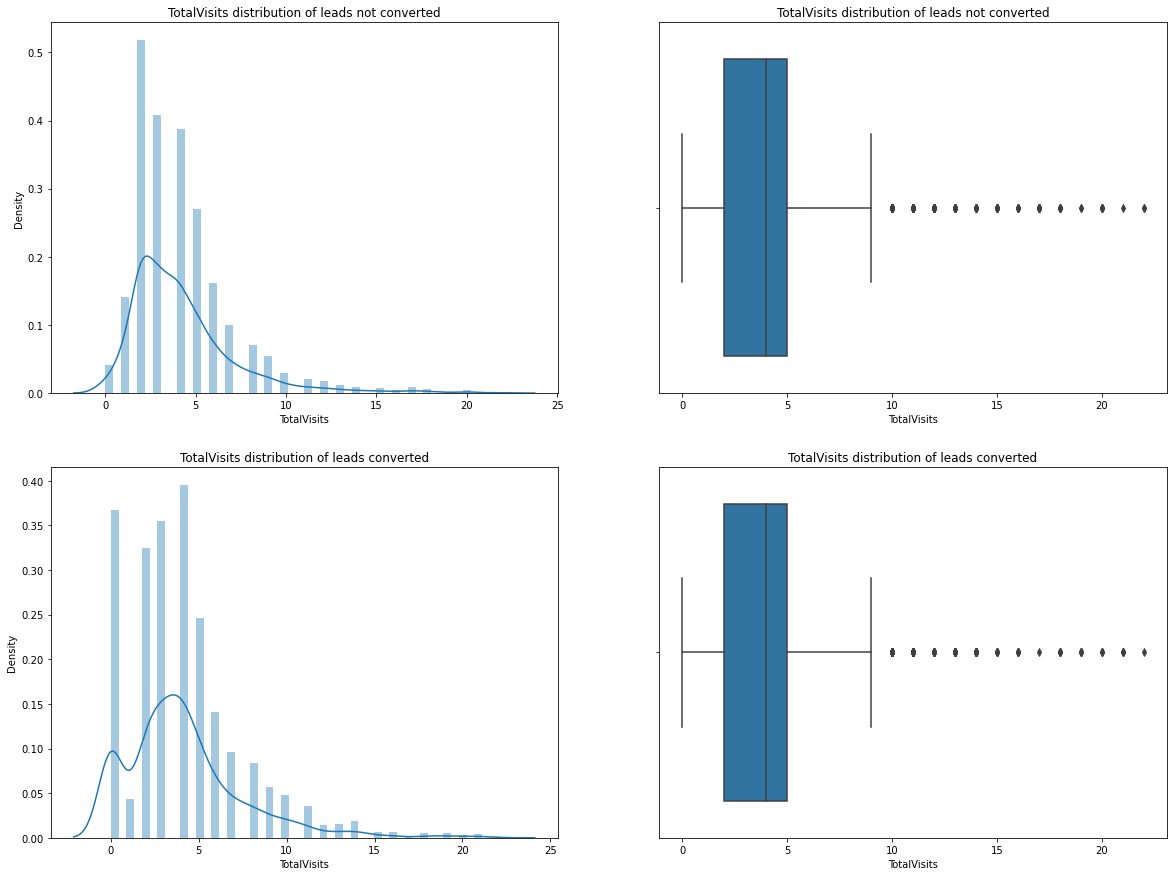

In [68]:
#Checking TotalVisits distribution for leads not converted vs leads converted

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('TotalVisits distribution of leads not converted')
sns.distplot(t0.TotalVisits)

plt.subplot(2,2,2)
plt.title('TotalVisits distribution of leads not converted')
sns.boxplot(t0.TotalVisits)



plt.subplot(2,2,3)
plt.title('TotalVisits distribution of leads converted')
sns.distplot(t1.TotalVisits)

plt.subplot(2,2,4)
plt.title('TotalVisits distribution of leads converted')
sns.boxplot(t1.TotalVisits)


plt.show()

In [69]:
t0.TotalVisits.describe()

count    3250.000000
mean        4.233231
std         2.959520
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        22.000000
Name: TotalVisits, dtype: float64

The distribution is right skewed distribution, number of Total Visits with higher amount is lesser compare to number of small total visits in both converted and not converted case

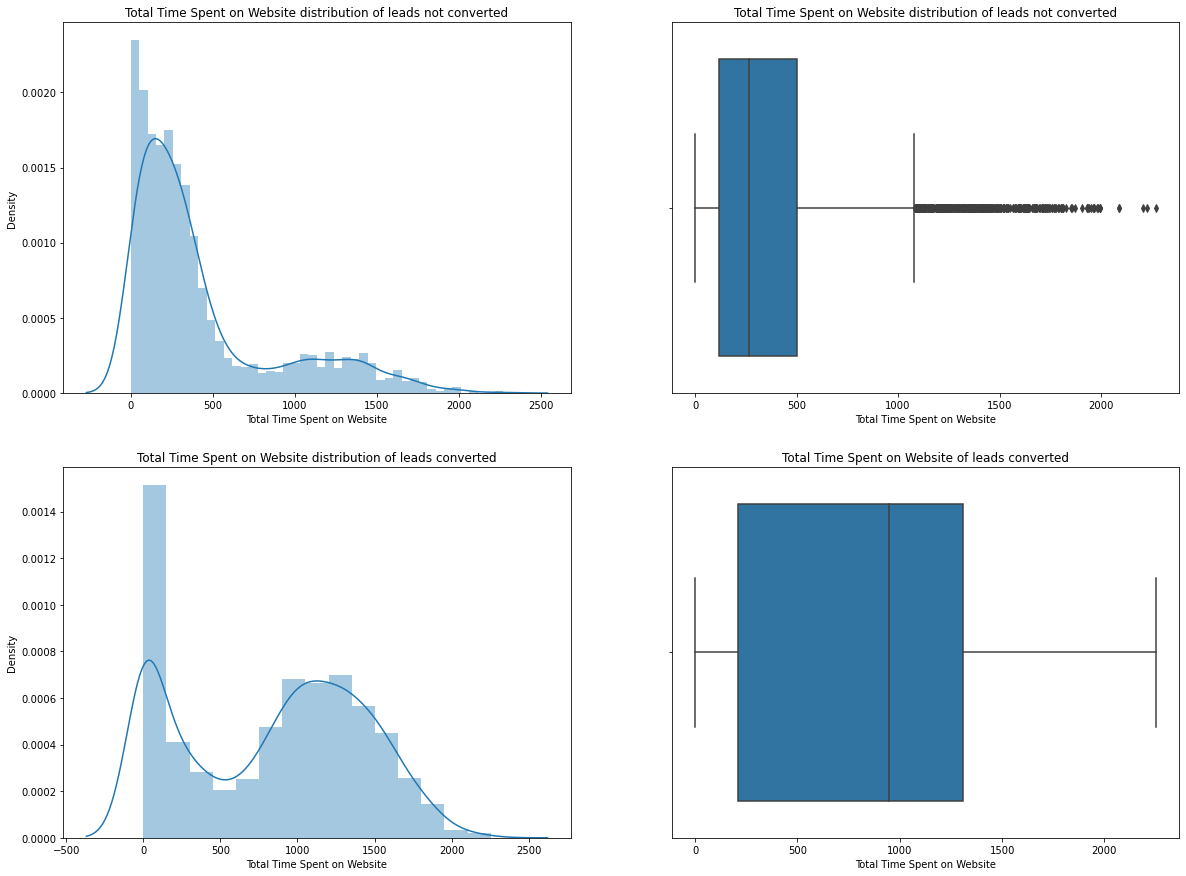

In [70]:
#Checking Total Time Spent on Website distribution for leads not converted vs leads converted

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Total Time Spent on Website distribution of leads not converted')
sns.distplot(t0["Total Time Spent on Website"])

plt.subplot(2,2,2)
plt.title('Total Time Spent on Website distribution of leads not converted')
sns.boxplot(t0["Total Time Spent on Website"])



plt.subplot(2,2,3)
plt.title('Total Time Spent on Website distribution of leads converted')
sns.distplot(t1["Total Time Spent on Website"])

plt.subplot(2,2,4)
plt.title('Total Time Spent on Website of leads converted')
sns.boxplot(t1["Total Time Spent on Website"])


plt.show()

The distribution is right skewed distribution, Most of the visitors spent lesser time. 

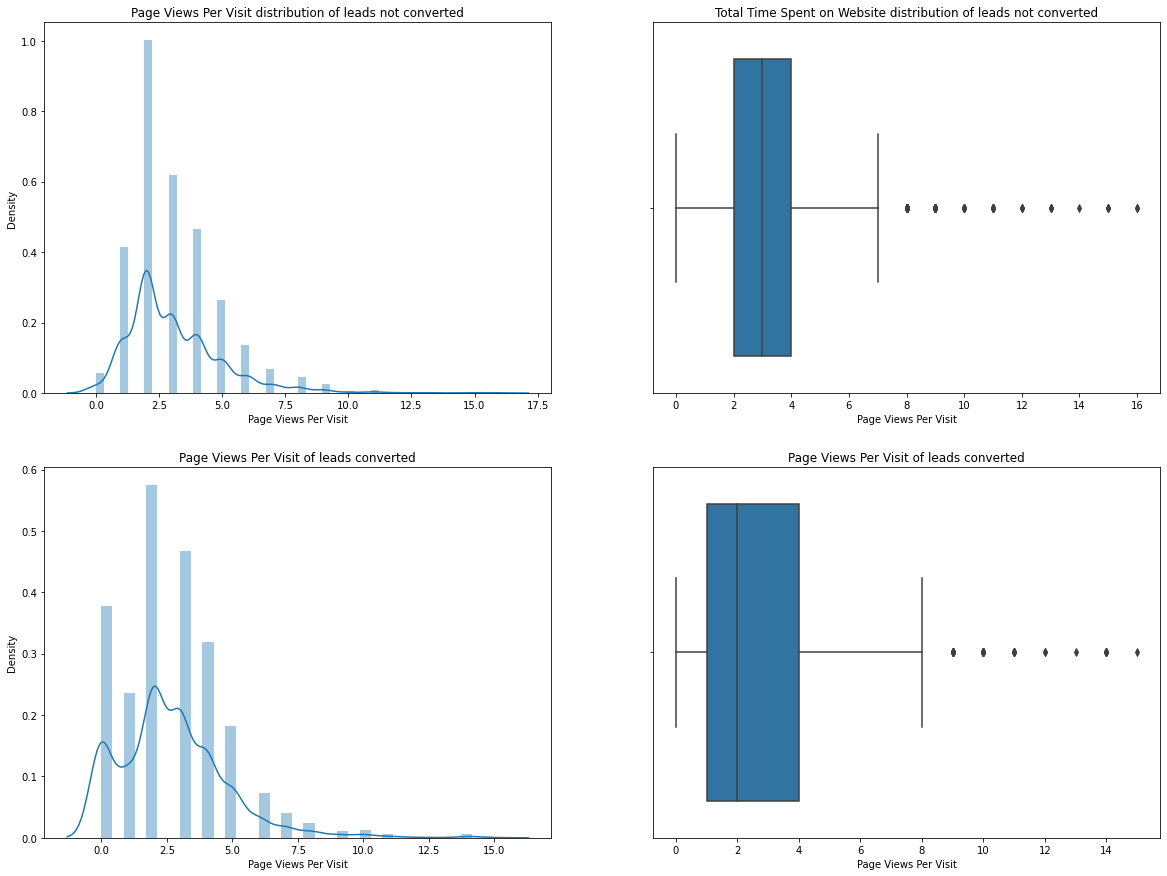

In [71]:
#Checking Page Views Per Visit distribution for leads not converted vs leads converted

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Page Views Per Visit distribution of leads not converted')
sns.distplot(t0["Page Views Per Visit"])

plt.subplot(2,2,2)
plt.title('Total Time Spent on Website distribution of leads not converted')
sns.boxplot(t0["Page Views Per Visit"])



plt.subplot(2,2,3)
plt.title('Page Views Per Visit of leads converted')
sns.distplot(t1["Page Views Per Visit"])

plt.subplot(2,2,4)
plt.title('Page Views Per Visit of leads converted')
sns.boxplot(t1["Page Views Per Visit"])


plt.show()

The distribution is right skewed distribution, Most of the page views per visit is in range of 2 to 4 in case of not converted leads. For converted leads, most of the page views per visit is between 2 to 5.

### Univariate Analysis of Categorical Variables

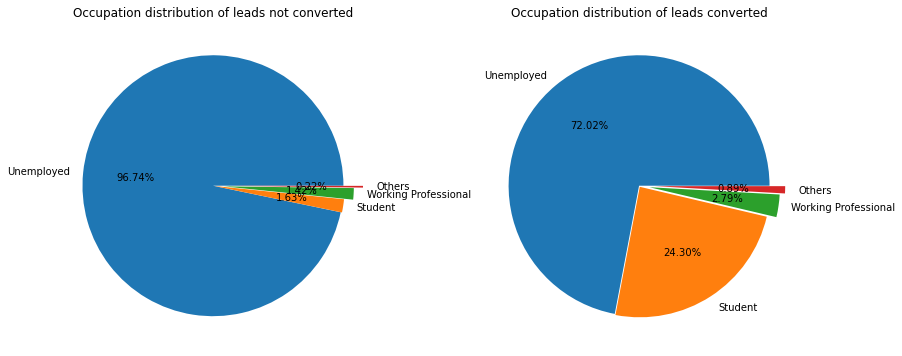

In [72]:
#Checking Occupationn distribution for not converted vs converted leads

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Occupation distribution of leads not converted')
plt.pie(t0["What is your current occupation"].value_counts(normalize=True)*100, labels=['Unemployed','Student','Working Professional','Others'],explode=(0,0.01,0.08,0.15),autopct='%1.2f%%')

plt.subplot(1,2,2)
plt.title('Occupation distribution of leads converted')
plt.pie(t1["What is your current occupation"].value_counts(normalize=True)*100, labels=['Unemployed','Student','Working Professional','Others'],explode=(0,0.01,0.08,0.12),autopct='%1.2f%%')

plt.show()


So it can be observed that Unemployeds are majority in both cases though there is increase in Student percentages in case of leads converted.

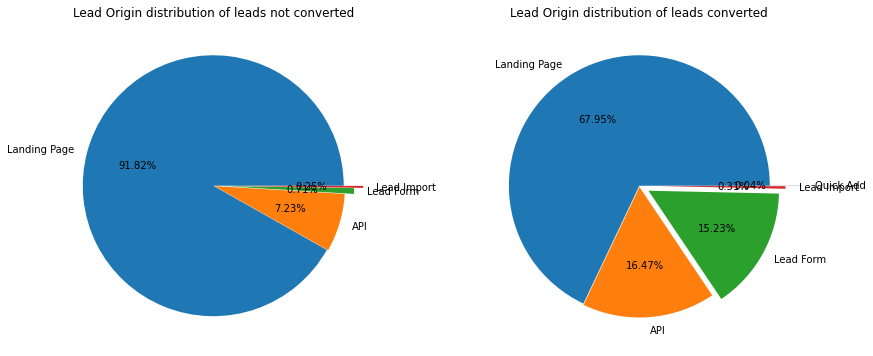

In [73]:
#Checking Lead Origin distribution for not converted vs converted leads

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Lead Origin distribution of leads not converted')
plt.pie(t0["Lead Origin"].value_counts(normalize=True)*100, labels=['Landing Page','API','Lead Form','Lead Import'],explode=(0,0.01,0.08,0.15),autopct='%1.2f%%')

plt.subplot(1,2,2)
plt.title('Lead Origin distribution of leads converted')
plt.pie(t1["Lead Origin"].value_counts(normalize=True)*100, labels=['Landing Page','API','Lead Form','Lead Import','Quick Add'],explode=(0,0.01,0.08,0.12,0.25),autopct='%1.2f%%')

plt.show()

Landing page is majority in both cases though there is increase in API and Lead form percentages in case of leads converted.

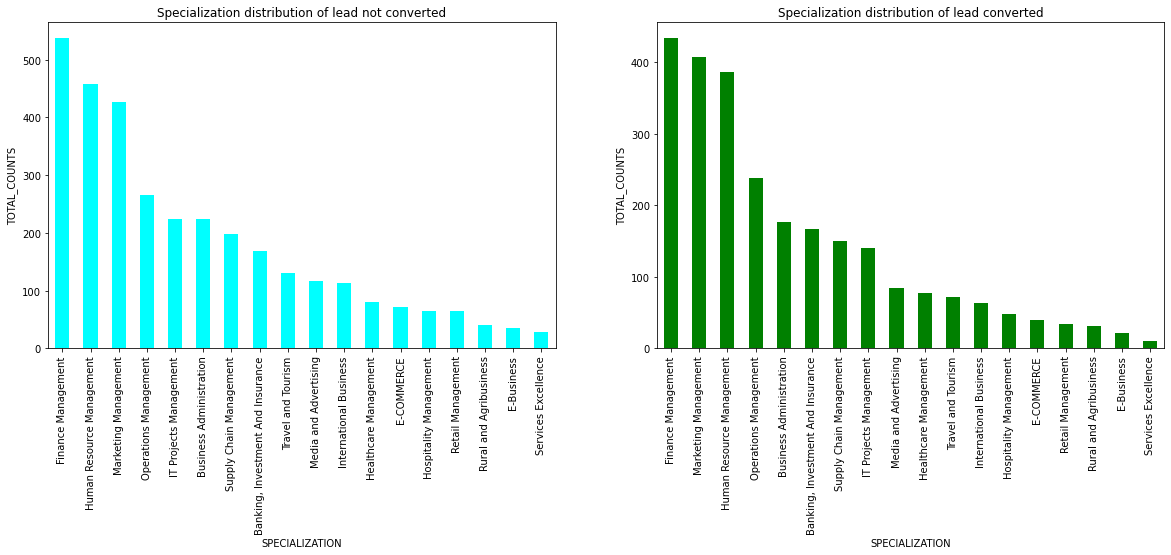

In [74]:
#Checking Specialization distribution for lead not converted vs lead converted

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Specialization distribution of lead not converted')
t0.Specialization.value_counts().plot.bar(color='cyan')
plt.xlabel("SPECIALIZATION")
plt.ylabel("TOTAL_COUNTS")


plt.subplot(1,2,2)
plt.title('Specialization distribution of lead converted')
t1.Specialization.value_counts().plot.bar(color='green')
plt.xlabel("SPECIALIZATION")
plt.ylabel("TOTAL_COUNTS")

plt.show()

Most of the leads are from finance management, marketing management and HR management background.

#### Converting binary variables (Yes/No) to 0/1 

In [75]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [76]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,Business Administration,Student,0,0,0,0,0,0,0,0,0,0,Mumbai,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,0,1,2,1640,2,Supply Chain Management,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,0,0,0,2,71,2,IT Projects Management,Unemployed,0,0,0,0,0,0,0,0,0,0,Thane & Outskirts,0,1
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,0,0,0,4,58,4,Finance Management,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [77]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation']], drop_first=True)
dummy2 = pd.get_dummies(leads_data[['City']], drop_first=False)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1, dummy2], axis=1)

In [78]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other_City,City_Thane & Outskirts
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,Business Administration,Student,0,0,0,0,0,0,0,0,0,0,Mumbai,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,0,1,2,1640,2,Supply Chain Management,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,0,0,0,2,71,2,IT Projects Management,Unemployed,0,0,0,0,0,0,0,0,0,0,Thane & Outskirts,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,0,0,0,4,58,4,Finance Management,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


#### Dropping the repeated variables

In [79]:
# We have created dummies for the below variables, so we can drop them
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation','City'], 1)

In [80]:
leads_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other_City,City_Thane & Outskirts
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2,1532,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1,305,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,0,0,1,2,1640,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,0,0,0,2,71,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,0,0,0,4,58,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [81]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5830 entries, 2 to 9239
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Prospect ID                                           5830 non-null   object
 1   Lead Number                                           5830 non-null   int64 
 2   Do Not Email                                          5830 non-null   int64 
 3   Do Not Call                                           5830 non-null   int64 
 4   Converted                                             5830 non-null   int64 
 5   TotalVisits                                           5830 non-null   int32 
 6   Total Time Spent on Website                           5830 non-null   int64 
 7   Page Views Per Visit                                  5830 non-null   int32 
 8   Search                                                5830 non-null 

### Test Train Split 

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# Putting feature variable to X
X = leads_data.drop(['Converted','Prospect ID','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other_City,City_Thane & Outskirts
2,0,0,2,1532,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,305,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
6,0,0,2,1640,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
8,0,0,2,71,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9,0,0,4,58,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [84]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

2    1
3    0
6    1
8    0
9    0
Name: Converted, dtype: int64

In [85]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling 

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other_City,City_Thane & Outskirts
4637,0,0,-0.694959,-0.971116,-0.468295,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
6181,0,0,1.540430,-0.632929,2.988543,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
8226,0,0,-0.375617,1.221706,0.025539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1493,0,0,0.263065,-0.460237,1.013207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9086,0,0,-0.375617,-0.771442,0.025539,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [88]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other_City,City_Thane & Outskirts
count,4080.000000,4080.000000,4.080000e+03,4.080000e+03,4.080000e+03,4080.000000,4080.0,4080.000000,4080.000000,4080.000000,4080.000000,4080.00000,4080.0,4080.0,4080.0,4080.0,4080.000000,4080.000000,4080.000000,4080.000000,4080.0,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,0.086520,0.000490,9.036889e-17,-5.447712e-17,-2.210752e-17,0.001471,0.0,0.000245,0.000245,0.000245,0.000735,0.00098,0.0,0.0,0.0,0.0,0.484069,0.811765,0.072549,0.002451,0.0,0.347059,0.039951,0.128676,0.013480,0.068627,0.071078,0.008824,0.017157,0.171569,0.028676,0.020588,0.142647,0.063725,0.030392,0.142157,0.034314,0.082598,0.016422,0.012010,0.007108,0.059314,0.035049,0.019363,0.857353,0.117647,0.623775,0.258578,0.117647
std,0.281164,0.022138,1.000123e+00,1.000123e+00,1.000123e+00,0.038325,0.0,0.015656,0.015656,0.015656,0.027110,0.03130,0.0,0.0,0.0,0.0,0.499807,0.390948,0.259427,0.049453,0.0,0.476093,0.195868,0.334883,0.115334,0.252851,0.256987,0.093530,0.129872,0.377051,0.166916,0.142019,0.349755,0.244293,0.171685,0.349254,0.182056,0.275307,0.127106,0.108943,0.084018,0.236240,0.183926,0.137813,0.349755,0.322229,0.484497,0.437907,0.322229
min,0.000000,0.000000,-1.333641e+00,-1.095238e+00,-1.455963e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-6.949586e-01,-8.595862e-01,-4.682950e-01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-5.627607e-02,-4.296564e-01,2.553896e-02,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [89]:
### Checking the Converted Rate
converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
converted

44.25385934819897

We have 44.25% converted rate

### Correlation Checking

In [90]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

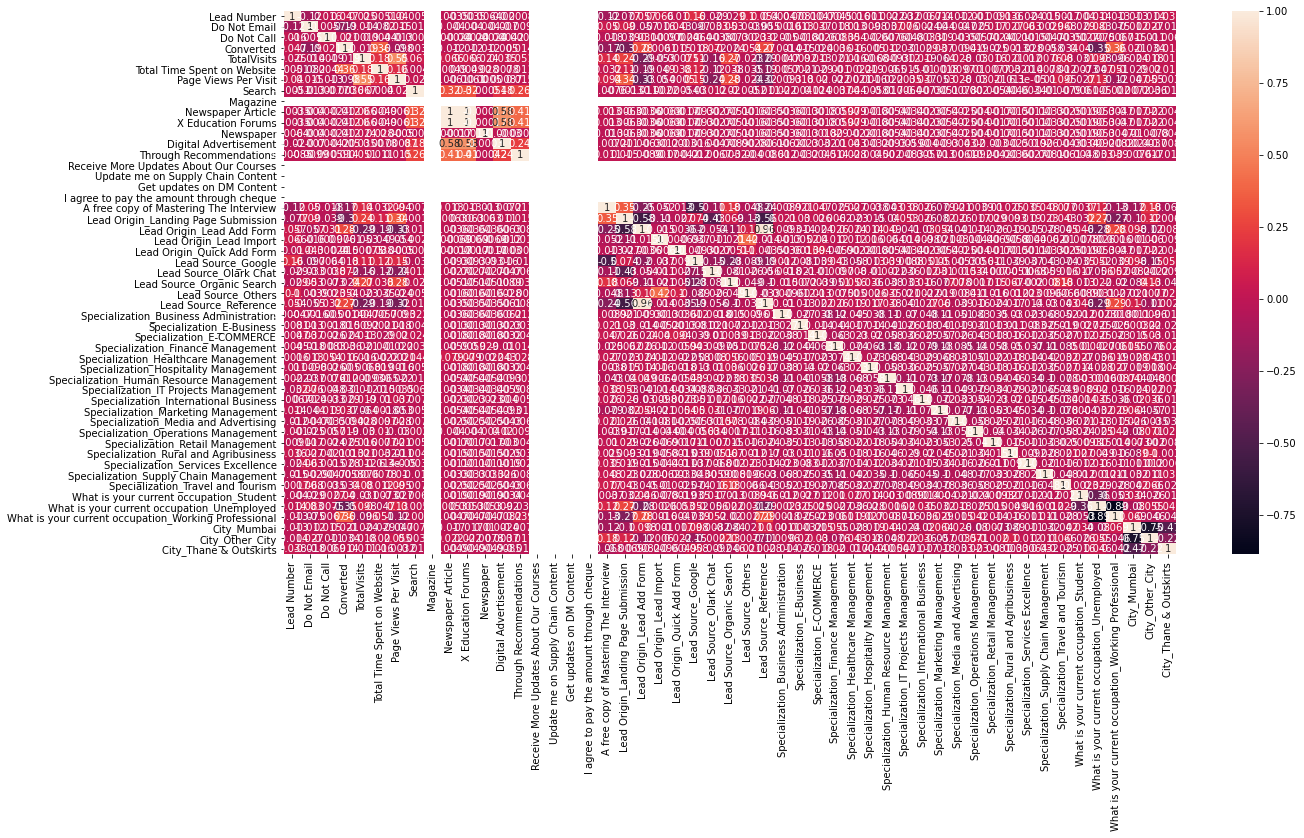

In [91]:
# correlation matrix 
plt.figure(figsize = (20,10))        
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

### Model Building

In [92]:
import statsmodels.api as sm

In [93]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4080
Model:                            GLM   Df Residuals:                     4038
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 08 Feb 2022   Deviance:                   1.1043e+05
Time:                        21:56:43   Pearson chi2:                 5.40e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 9.185e+14   1.15e+07   7.99e+07      0.000    9.19e+14    9.19e+14
Do Not Email                                          5.266e+14   3.84e+06   1.37e+08      0.000    5.27e+14    5.27e+14
Do Not Call                                           5.676e+15   4.77e+07   1.19e+08      0.000    5.68e+15    5.68e+15
TotalVisits                                           4.131e+14   1.32e+06   3.12e+08      0.000    4.13e+14    4.13e+14
Total Time Spent on Website                           6.792e+14   1.12e+06   6.09e+08      0.000    6.79e+14    6.79e+14
Page Views Per Visit                                  -1.73e+14   1.36e+06  -1.27e+08      0.000   -1.73e+14   -1.73e+14
Search                                                2.508e+15   3.02e+07    8.3e+07      0.000    2.51e+15    2.51e+15
Magazine                                               -29.6596   2.95e-07     -1e+08      0.000     -29.660     -29.660
Newspaper Article                                    -7.161e+15   4.82e+07  -1.48e+08      0.000   -7.16e+15   -7.16e+15
X Education Forums                                   -7.161e+15   4.82e+07  -1.48e+08      0.000   -7.16e+15   -7.16e+15
Newspaper                                            -5.395e+15   6.73e+07  -8.02e+07      0.000    -5.4e+15    -5.4e+15
Digital Advertisement                                 1.911e+15   4.76e+07   4.01e+07      0.000    1.91e+15    1.91e+15
Through Recommendations                               4.019e+15    3.9e+07   1.03e+08      0.000    4.02e+15    4.02e+15
Receive More Updates About Our Courses                  -5.0401    6.1e-08  -8.27e+07      0.000      -5.040      -5.040
Update me on Supply Chain Content                      -22.7552   2.38e-07  -9.57e+07      0.000     -22.755     -22.755
Get updates on DM Content                               -8.6640   1.06e-07  -8.19e+07      0.000      -8.664      -8.664
I agree to pay the amount through cheque                -1.2788   1.32e-07   -9.7e+06      0.000      -1.279      -1.279
A free copy of Mastering The Interview                4.819e+13    2.9e+06   1.66e+07      0.000    4.82e+13    4.82e+13
Lead Origin_Landing Page Submission                  -2.004e+15   4.29e+06  -4.67e+08      0.000      -2e+15      -2e+15
Lead Origin_Lead Add Form                             8.561e+14      2e+07   4.27e+07      0.000    8.56e+14    8.56e+14
Lead Origin_Lead Import                               1.119e+15   2.46e+07   4.54e+07      0.000    1.12e+15    1.12e+15
Lead Origin_Quick Add Form                              18.9887      1e-07   1.89e+08      0.000      18.989      18.989
Lead Source_Google                                   -2.63

### Feature Selection Using RFE

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [95]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [96]:
rfe.support_

array([ True,  True, False,  True, False, False, False,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True, False,  True, False])

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Search', False, 7),
 ('Magazine', False, 27),
 ('Newspaper Article', True, 1),
 ('X Education Forums', True, 1),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', False, 23),
 ('Receive More Updates About Our Courses', False, 25),
 ('Update me on Supply Chain Content', False, 26),
 ('Get updates on DM Content', False, 28),
 ('I agree to pay the amount through cheque', False, 29),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', T

In [98]:
col = X_train.columns[rfe.support_]

In [99]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Magazine',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Tra

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4080
Model:                            GLM   Df Residuals:                     4060
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1873.3
Date:                Tue, 08 Feb 2022   Deviance:                       3746.6
Time:                        21:56:45   Pearson chi2:                 4.77e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4109      0.596      2.366      0.018       0.242       2.580
Do Not Email                                            -1.6620      0.202     -8.246      0.000      -2.057      -1.267
Do Not Call                                             19.5796   2.02e+04      0.001      0.999   -3.95e+04    3.95e+04
Total Time Spent on Website                              1.1073      0.045     24.826      0.000       1.020       1.195
Newspaper Article                                      -10.5883   1.46e+04     -0.001      0.999   -2.87e+04    2.86e+04
X Education Forums                                     -10.5883   1.46e+04     -0.001      0.999   -2.87e+04    2.86e+04
Newspaper                                              -23.3158   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
A free copy of Mastering The Interview                  -0.3456      0.085     -4.048      0.000      -0.513      -0.178
Lead Origin_Landing Page Submission                     -0.7319      0.161     -4.547      0.000      -1.047      -0.416
Lead Origin_Lead Add Form                                2.5787      1.125      2.293      0.022       0.374       4.783
Lead Origin_Lead Import                                 -0.6382      0.828     -0.771      0.441      -2.261       0.984
Lead Source_Olark Chat                                   0.7439      0.241      3.082      0.002       0.271       1.217
Lead Source_Others                                       1.3416      0.441      3.044      0.002       0.478       2.205
Lead Source_Reference                                    0.6136      1.153      0.532      0.595      -1.646       2.873
Specialization_Business Administration                  -0.1789      0.160     -1.121      0.262      -0.492       0.134
Specialization_Hospitality Management                   -0.6940      0.294     -2.361      0.018      -1.270      -0.118
Specialization_Retail Management                        -0.2598      0.327     -0.794      0.427      -0.901       0.381
What is your current occupation_Student                 -0.4137      0.643     -0.643      0.520      -1.675       0.847
What is your current occupation_Unemployed              -1.3258      0.582     -2.277      0.023      -2.467      -0.185
What is your current occupation_Working Professional     1.4451      0.614      2.355      0.019       0.242       2.648
City_Other_City                                          0.1944      0.093      2.093      0.036       0.012       0.377
========================================================================================================================
"""

A lot of feature variables have high p value, we have to drop these variables.

### Checking VIFs 

In [101]:
# Checking VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Newspaper Article,inf
4,X Education Forums,inf
8,Lead Origin_Lead Add Form,26.05
12,Lead Source_Reference,25.33
7,Lead Origin_Landing Page Submission,12.61
17,What is your current occupation_Unemployed,12.23
18,What is your current occupation_Working Profes...,2.41
6,A free copy of Mastering The Interview,2.27
11,Lead Source_Others,1.70
10,Lead Source_Olark Chat,1.56


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Newspaper Article' has the highest VIF. So let's start by dropping that.

In [103]:
col = col.drop('Newspaper Article', 1)
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'X Education Forums', 'Newspaper',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Specialization_Business Administration',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other_City'],
      dtype='object')

In [104]:
# re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4080
Model:                            GLM   Df Residuals:                     4060
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1873.3
Date:                Tue, 08 Feb 2022   Deviance:                       3746.6
Time:                        21:56:45   Pearson chi2:                 4.77e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4109      0.596      2.366      0.018       0.242       2.580
Do Not Email                                            -1.6620      0.202     -8.246      0.000      -2.057      -1.267
Do Not Call                                             19.5796   2.02e+04      0.001      0.999   -3.95e+04    3.95e+04
Total Time Spent on Website                              1.1073      0.045     24.826      0.000       1.020       1.195
X Education Forums                                     -21.1767   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Newspaper                                              -23.3158   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
A free copy of Mastering The Interview                  -0.3456      0.085     -4.048      0.000      -0.513      -0.178
Lead Origin_Landing Page Submission                     -0.7319      0.161     -4.547      0.000      -1.047      -0.416
Lead Origin_Lead Add Form                                2.5787      1.125      2.293      0.022       0.374       4.783
Lead Origin_Lead Import                                 -0.6382      0.828     -0.771      0.441      -2.261       0.984
Lead Source_Olark Chat                                   0.7439      0.241      3.082      0.002       0.271       1.217
Lead Source_Others                                       1.3416      0.441      3.044      0.002       0.478       2.205
Lead Source_Reference                                    0.6136      1.153      0.532      0.595      -1.646       2.873
Specialization_Business Administration                  -0.1789      0.160     -1.121      0.262      -0.492       0.134
Specialization_Hospitality Management                   -0.6940      0.294     -2.361      0.018      -1.270      -0.118
Specialization_Retail Management                        -0.2598      0.327     -0.794      0.427      -0.901       0.381
What is your current occupation_Student                 -0.4137      0.643     -0.643      0.520      -1.675       0.847
What is your current occupation_Unemployed              -1.3258      0.582     -2.277      0.023      -2.467      -0.185
What is your current occupation_Working Professional     1.4451      0.614      2.355      0.019       0.242       2.648
City_Other_City                                          0.1944      0.093      2.093      0.036       0.012       0.377
========================================================================================================================
"""

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Origin_Lead Add Form,26.05
11,Lead Source_Reference,25.33
6,Lead Origin_Landing Page Submission,12.61
16,What is your current occupation_Unemployed,12.23
17,What is your current occupation_Working Profes...,2.41
5,A free copy of Mastering The Interview,2.27
10,Lead Source_Others,1.70
9,Lead Source_Olark Chat,1.56
18,City_Other_City,1.41
8,Lead Origin_Lead Import,1.33


In [106]:
#dropping the next high VIF feature Lead Origin_Lead Add Form
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'X Education Forums', 'Newspaper',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Specialization_Business Administration',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other_City'],
      dtype='object')

In [107]:
# re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4080
Model:                            GLM   Df Residuals:                     4061
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1877.3
Date:                Tue, 08 Feb 2022   Deviance:                       3754.7
Time:                        21:56:45   Pearson chi2:                 4.77e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4670      0.597      2.458      0.014       0.297       2.637
Do Not Email                                            -1.6551      0.200     -8.258      0.000      -2.048      -1.262
Do Not Call                                             19.5452   2.01e+04      0.001      0.999   -3.95e+04    3.95e+04
Total Time Spent on Website                              1.1031      0.045     24.767      0.000       1.016       1.190
X Education Forums                                     -21.1688   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Newspaper                                              -23.3056   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
A free copy of Mastering The Interview                  -0.3485      0.085     -4.086      0.000      -0.516      -0.181
Lead Origin_Landing Page Submission                     -0.7978      0.159     -5.003      0.000      -1.110      -0.485
Lead Origin_Lead Import                                 -1.2221      0.796     -1.536      0.125      -2.782       0.338
Lead Source_Olark Chat                                   0.6937      0.240      2.890      0.004       0.223       1.164
Lead Source_Others                                       1.8580      0.392      4.741      0.000       1.090       2.626
Lead Source_Reference                                    3.1235      0.320      9.757      0.000       2.496       3.751
Specialization_Business Administration                  -0.1777      0.159     -1.116      0.264      -0.490       0.134
Specialization_Hospitality Management                   -0.6982      0.294     -2.378      0.017      -1.274      -0.123
Specialization_Retail Management                        -0.2598      0.327     -0.794      0.427      -0.901       0.381
What is your current occupation_Student                 -0.4045      0.644     -0.628      0.530      -1.667       0.858
What is your current occupation_Unemployed              -1.3171      0.583     -2.260      0.024      -2.460      -0.175
What is your current occupation_Working Professional     1.4489      0.614      2.359      0.018       0.245       2.653
City_Other_City                                          0.1921      0.093      2.069      0.039       0.010       0.374
========================================================================================================================
"""

In [108]:
# checking feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Landing Page Submission,12.35
15,What is your current occupation_Unemployed,11.97
16,What is your current occupation_Working Profes...,2.38
5,A free copy of Mastering The Interview,2.27
10,Lead Source_Reference,2.03
8,Lead Source_Olark Chat,1.56
17,City_Other_City,1.41
9,Lead Source_Others,1.27
14,What is your current occupation_Student,1.26
7,Lead Origin_Lead Import,1.24


In [109]:
#dropping the next high VIF feature Lead Origin_Landing Page Submission
col = col.drop('Lead Origin_Landing Page Submission', 1)
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'X Education Forums', 'Newspaper',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Specialization_Business Administration',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other_City'],
      dtype='object')

In [110]:
# re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4080
Model:                            GLM   Df Residuals:                     4062
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1890.1
Date:                Tue, 08 Feb 2022   Deviance:                       3780.1
Time:                        21:56:45   Pearson chi2:                 4.78e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8652      0.577      1.499      0.134      -0.266       1.997
Do Not Email                                            -1.6680      0.200     -8.331      0.000      -2.060      -1.276
Do Not Call                                             19.9747   2.02e+04      0.001      0.999   -3.96e+04    3.96e+04
Total Time Spent on Website                              1.1105      0.044     25.018      0.000       1.024       1.198
X Education Forums                                     -21.1786   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Newspaper                                              -23.4287   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
A free copy of Mastering The Interview                  -0.4302      0.084     -5.148      0.000      -0.594      -0.266
Lead Origin_Lead Import                                 -0.7994      0.788     -1.014      0.310      -2.344       0.745
Lead Source_Olark Chat                                   1.4116      0.193      7.306      0.000       1.033       1.790
Lead Source_Others                                       2.1358      0.382      5.588      0.000       1.387       2.885
Lead Source_Reference                                    3.8235      0.289     13.249      0.000       3.258       4.389
Specialization_Business Administration                  -0.1942      0.159     -1.222      0.222      -0.505       0.117
Specialization_Hospitality Management                   -0.6949      0.292     -2.377      0.017      -1.268      -0.122
Specialization_Retail Management                        -0.2530      0.324     -0.781      0.435      -0.888       0.382
What is your current occupation_Student                 -0.5091      0.638     -0.798      0.425      -1.759       0.741
What is your current occupation_Unemployed              -1.4062      0.576     -2.440      0.015      -2.536      -0.277
What is your current occupation_Working Professional     1.3986      0.608      2.301      0.021       0.207       2.590
City_Other_City                                          0.1738      0.093      1.879      0.060      -0.007       0.355
========================================================================================================================
"""

In [111]:
# checking feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,2.51
5,A free copy of Mastering The Interview,2.16
16,City_Other_City,1.41
15,What is your current occupation_Working Profes...,1.36
9,Lead Source_Reference,1.34
8,Lead Source_Others,1.24
6,Lead Origin_Lead Import,1.23
0,Do Not Email,1.12
2,Total Time Spent on Website,1.10
7,Lead Source_Olark Chat,1.09


In [112]:
#dropping the next high p value features
col = col.drop(['Do Not Call','X Education Forums','Newspaper'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Specialization_Business Administration',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other_City'],
      dtype='object')

In [113]:
# re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4080
Model:                            GLM   Df Residuals:                     4065
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1893.0
Date:                Tue, 08 Feb 2022   Deviance:                       3785.9
Time:                        21:56:45   Pearson chi2:                 4.79e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8645      0.577      1.498      0.134      -0.266       1.995
Do Not Email                                            -1.6660      0.200     -8.323      0.000      -2.058      -1.274
Total Time Spent on Website                              1.1077      0.044     24.997      0.000       1.021       1.195
A free copy of Mastering The Interview                  -0.4290      0.084     -5.138      0.000      -0.593      -0.265
Lead Origin_Lead Import                                 -0.7997      0.788     -1.015      0.310      -2.344       0.745
Lead Source_Olark Chat                                   1.4110      0.193      7.304      0.000       1.032       1.790
Lead Source_Others                                       2.1354      0.382      5.589      0.000       1.387       2.884
Lead Source_Reference                                    3.8305      0.288     13.282      0.000       3.265       4.396
Specialization_Business Administration                  -0.1924      0.159     -1.212      0.226      -0.504       0.119
Specialization_Hospitality Management                   -0.6926      0.292     -2.370      0.018      -1.265      -0.120
Specialization_Retail Management                        -0.2506      0.324     -0.774      0.439      -0.885       0.384
What is your current occupation_Student                 -0.5095      0.638     -0.799      0.424      -1.759       0.740
What is your current occupation_Unemployed              -1.4072      0.576     -2.442      0.015      -2.536      -0.278
What is your current occupation_Working Professional     1.3982      0.608      2.301      0.021       0.207       2.589
City_Other_City                                          0.1725      0.092      1.866      0.062      -0.009       0.354
========================================================================================================================
"""

In [114]:
#dropping the next high p value features 
col = col.drop(['What is your current occupation_Student','Specialization_Retail Management','Specialization_Business Administration','Lead Origin_Lead Import'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Specialization_Hospitality Management',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other_City'],
      dtype='object')

In [115]:
# re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4080
Model:                            GLM   Df Residuals:                     4069
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1894.8
Date:                Tue, 08 Feb 2022   Deviance:                       3789.6
Time:                        21:56:45   Pearson chi2:                 4.79e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4302      0.252      1.708      0.088      -0.064       0.924
Do Not Email                                            -1.6589      0.200     -8.309      0.000      -2.050      -1.268
Total Time Spent on Website                              1.1083      0.044     25.046      0.000       1.022       1.195
A free copy of Mastering The Interview                  -0.4292      0.083     -5.149      0.000      -0.593      -0.266
Lead Source_Olark Chat                                   1.4102      0.193      7.303      0.000       1.032       1.789
Lead Source_Others                                       1.9586      0.332      5.908      0.000       1.309       2.608
Lead Source_Reference                                    3.8352      0.288     13.301      0.000       3.270       4.400
Specialization_Hospitality Management                   -0.6895      0.292     -2.365      0.018      -1.261      -0.118
What is your current occupation_Unemployed              -0.9905      0.250     -3.963      0.000      -1.480      -0.501
What is your current occupation_Working Professional     1.8194      0.315      5.771      0.000       1.202       2.437
City_Other_City                                          0.1706      0.092      1.847      0.065      -0.010       0.352
========================================================================================================================
"""

In [116]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4637    0.112463
6181    0.155643
8226    0.688621
1493    0.255321
9086    0.073506
546     0.533256
1540    0.414047
1564    0.887056
1853    0.208565
396     0.220567
dtype: float64

In [117]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11246273, 0.15564266, 0.68862067, 0.25532117, 0.07350551,
       0.53325643, 0.4140472 , 0.88705629, 0.20856464, 0.2205666 ])

In [118]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.112463,4637
1,0,0.155643,6181
2,1,0.688621,8226
3,0,0.255321,1493
4,0,0.073506,9086


In [119]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.112463,4637,0
1,0,0.155643,6181,0
2,1,0.688621,8226,1
3,0,0.255321,1493,0
4,0,0.073506,9086,0


In [120]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1912  373]
 [ 525 1270]]


In [121]:
# Actual/Predicted        not_converted    converted
        # not_converted     1912            373
        # converted         525             1270  

In [122]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7799019607843137


In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.7075208913649025

In [125]:
# specificity
TN / float(TN+FP)

0.8367614879649891

In [126]:
# false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.16323851203501094


In [127]:
# positive predictive value 
print (TP / float(TP+FP))

0.772976262933658


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7845711940910957


### Plotting the ROC Curve

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

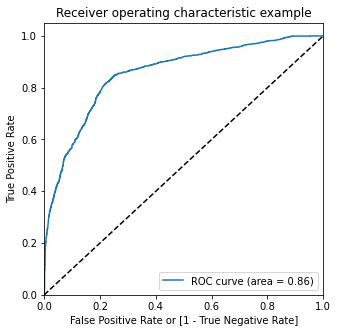

In [131]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

**The AUC coming as 0.86 which is good result**

### Finding Optimal Cutoff Point

In [132]:
#Finding Optimal cutoff probability where we get balanced sensitivity and specificity

In [133]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.112463,4637,0,1,1,0,0,0,0,0,0,0,0
1,0,0.155643,6181,0,1,1,0,0,0,0,0,0,0,0
2,1,0.688621,8226,1,1,1,1,1,1,1,1,0,0,0
3,0,0.255321,1493,0,1,1,1,0,0,0,0,0,0,0
4,0,0.073506,9086,0,1,0,0,0,0,0,0,0,0,0


In [134]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.439951     1.000000     0.000000
0.1   0.1  0.505392     0.997772     0.118600
0.2   0.2  0.696814     0.909749     0.529540
0.3   0.3  0.786275     0.855153     0.732166
0.4   0.4  0.796078     0.809471     0.785558
0.5   0.5  0.779902     0.707521     0.836761
0.6   0.6  0.760539     0.608357     0.880088
0.7   0.7  0.743627     0.503064     0.932604
0.8   0.8  0.706618     0.377159     0.965427
0.9   0.9  0.664216     0.250696     0.989059


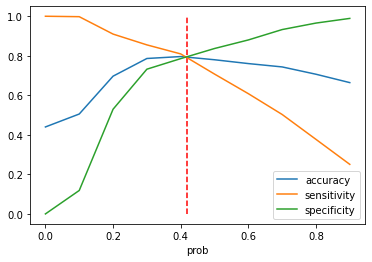

In [135]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.vlines(x=0.42, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

**From the curve above, 0.42 is the optimum point to take it as a cutoff probability when Sensitivity will be around 80%**

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final['predicted_leadscore'] = y_train_pred_final.Converted_Prob.map( lambda x: x*100)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,predicted_leadscore
0,0,0.112463,4637,0,1,1,0,0,0,0,0,0,0,0,0,11.246273
1,0,0.155643,6181,0,1,1,0,0,0,0,0,0,0,0,0,15.564266
2,1,0.688621,8226,1,1,1,1,1,1,1,1,0,0,0,1,68.862067
3,0,0.255321,1493,0,1,1,1,0,0,0,0,0,0,0,0,25.532117
4,0,0.073506,9086,0,1,0,0,0,0,0,0,0,0,0,0,7.350551


In [137]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )


In [138]:
print(confusion2)

[[1829  456]
 [ 394 1401]]


In [139]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7916666666666666


In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.7805013927576602

In [142]:
# specificity
TN / float(TN+FP)

0.8004376367614879

In [143]:
# false postive rate 
print(FP/ float(TN+FP))

0.19956236323851204


In [144]:
# positive predictive value 
print (TP / float(TP+FP))

0.7544426494345718


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8227620332883491


### Checking Precision and Recall tradeoff 

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
 5       1
 6       1
 7       1
 8       0
 9       1
 10      1
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      1
 19      1
 20      0
 21      0
 22      0
 23      0
 24      1
 25      1
 26      0
 27      1
 28      0
 29      1
 30      0
 31      0
 32      0
 33      1
 34      0
 35      0
 36      1
 37      1
 38      0
 39      1
 40      1
 41      0
 42      1
 43      0
 44      1
 45      1
 46      0
 47      1
 48      0
 49      0
 50      1
 51      1
 52      0
 53      0
 54      1
 55      0
 56      1
 57      0
 58      0
 59      1
 60      0
 61      1
 62      0
 63      1
 64      0
 65      1
 66      1
 67      0
 68      1
 69      0
 70      1
 71      0
 72      1
 73      0
 74      1
 75      0
 76      1
 77      0
 78      0
 79      1
 80      0
 81      1
 82      0
 83      1
 84      0
 85      1
 86      1
 87      0
 88      0
 89      1
 90      0

In [148]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

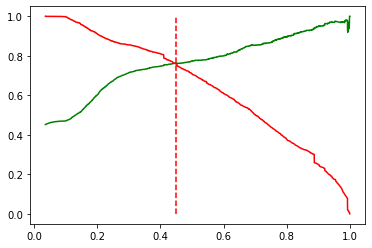

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.45, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

**From precision recall tradeoff it can be seen that threshold value is at 0.45 when Precision and Recall both value optimised but we will take 0.42 when Precision will be at around 77% & Recall/Sensitivity will be around 80%**

### Prediction on test data set

In [150]:
#transforming the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [151]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Specialization_Hospitality Management,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other_City
1227,0,-1.052065,1,0,0,0,0,1,0,1
2158,0,0.633475,0,0,0,1,0,1,0,0
4726,0,1.977231,0,0,0,0,0,1,0,0
7769,0,0.969864,0,0,0,0,0,1,0,0
4258,0,1.210912,1,0,0,0,0,1,0,0


In [152]:
#predicting on test set
X_test_sm = sm.add_constant(X_test)

In [153]:
y_test_pred = res.predict(X_test_sm)

In [154]:
y_test_pred[:10]

1227    0.120797
2158    0.981602
4726    0.836311
7769    0.625875
4258    0.587231
8731    0.116505
7399    0.032742
2421    0.161298
551     0.995554
2593    0.425501
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
y_pred_1.head()

,0
1227,0.120797
2158,0.981602
4726,0.836311
7769,0.625875
4258,0.587231


In [157]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [158]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [159]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

,Converted,LeadID,0
0,0,1227,0.120797
1,1,2158,0.981602
2,0,4726,0.836311
3,1,7769,0.625875
4,1,4258,0.587231


In [162]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'LeadScore_Prob'})

In [163]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','LeadScore_Prob'], axis=1)

In [164]:
y_pred_final.head()

,LeadID,Converted,LeadScore_Prob
0,1227,0,0.120797
1,2158,1,0.981602
2,4726,0,0.836311
3,7769,1,0.625875
4,4258,1,0.587231


In [165]:
#Generating the final predicted values of target variables and the score variable in scale of 100
y_pred_final['final_predicted'] = y_pred_final.LeadScore_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final['final_predicted_leadscore'] = y_pred_final.LeadScore_Prob.map(lambda x: x*100)


In [166]:
y_pred_final.head()

,LeadID,Converted,LeadScore_Prob,final_predicted,final_predicted_leadscore
0,1227,0,0.120797,0,12.079666
1,2158,1,0.981602,1,98.160237
2,4726,0,0.836311,1,83.631105
3,7769,1,0.625875,1,62.587500
4,4258,1,0.587231,1,58.723082


In [167]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.793596340766152

In [168]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )


In [169]:
confusion3

array([[778, 186],
       [175, 610]], dtype=int64)

In [170]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7770700636942676

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.8070539419087137

In [173]:
# Evaluating the model
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted, target_names=['Not Converted','Converted'])) 

               precision    recall  f1-score   support

Not Converted       0.82      0.81      0.81       964
    Converted       0.77      0.78      0.77       785

     accuracy                           0.79      1749
    macro avg       0.79      0.79      0.79      1749
 weighted avg       0.79      0.79      0.79      1749



**So we have got precision of 77% and Recall/Sensitivity 78% on the test data with Accuracy of 79% and F1 Score 77%**

In [174]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4080
Model:                            GLM   Df Residuals:                     4069
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1894.8
Date:                Tue, 08 Feb 2022   Deviance:                       3789.6
Time:                        21:56:47   Pearson chi2:                 4.79e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4302      0.252      1.708      0.088      -0.064       0.924
Do Not Email                                            -1.6589      0.200     -8.309      0.000      -2.050      -1.268
Total Time Spent on Website                              1.1083      0.044     25.046      0.000       1.022       1.195
A free copy of Mastering The Interview                  -0.4292      0.083     -5.149      0.000      -0.593      -0.266
Lead Source_Olark Chat                                   1.4102      0.193      7.303      0.000       1.032       1.789
Lead Source_Others                                       1.9586      0.332      5.908      0.000       1.309       2.608
Lead Source_Reference                                    3.8352      0.288     13.301      0.000       3.270       4.400
Specialization_Hospitality Management                   -0.6895      0.292     -2.365      0.018      -1.261      -0.118
What is your current occupation_Unemployed              -0.9905      0.250     -3.963      0.000      -1.480      -0.501
What is your current occupation_Working Professional     1.8194      0.315      5.771      0.000       1.202       2.437
City_Other_City                                          0.1706      0.092      1.847      0.065      -0.010       0.352
========================================================================================================================
"""

In [175]:
#Cross Checking the model using sklearn library
model = LogisticRegression(C=1.0, 
                           class_weight=None, 
                           dual=False, 
                           fit_intercept=True,
                           intercept_scaling=1, 
                           l1_ratio=None, 
                           max_iter=100,
                           n_jobs=None, 
                           penalty='l2',
                           random_state=1, 
                           solver='liblinear', 
                           tol=0.0001, 
                           verbose=0,
                           warm_start=False)
model.fit(X_train_sm, y_train)

LogisticRegression(random_state=1, solver='liblinear')

Feature: 0, Score: 0.23801
Feature: 1, Score: -1.58813
Feature: 2, Score: 1.09103
Feature: 3, Score: -0.44077
Feature: 4, Score: 1.33833
Feature: 5, Score: 1.74405
Feature: 6, Score: 3.54623
Feature: 7, Score: -0.61576
Feature: 8, Score: -1.01590
Feature: 9, Score: 1.72589
Feature: 10, Score: 0.16321


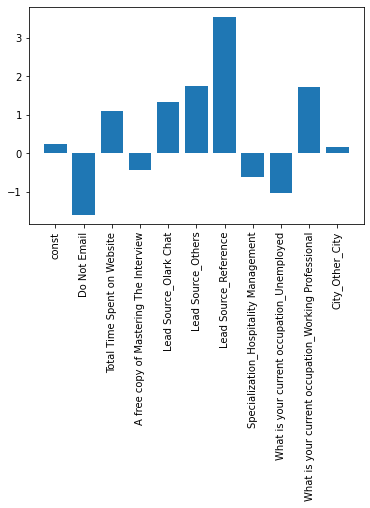

In [176]:
# getting importance of the top features
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], X_train_sm.columns[:], rotation=90)
plt.show()

**Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?**

Based on the coefficient values from model summary, the top three variables which would affect a lead getting converted into a customer are the following:

1. Reference in Lead Source
2. Others in Lead Source
3. Working Professional in What is your current Occupation

**What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?**

To increase the chances of a lead getting converted to a customer, the following categorical variables should be focused upon.

1. Specialization
2. What is your current Occupation
3. City

**X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.**

To apply an aggresive model to target maximum number of probable leads, we have to reduce the cutoff value to increase the Recall/Sensitivity value and decrease the Precision value. For this we can reduce the threshold cutoff value from 0.42 to 0.3 or 0.2 depending on how much desired number of lead conversion fixed by management.

**Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.**

For this strategy, we may consider cutoff value above 0.6 to increase the Precision value as we want to focus only on leads who have highest probability of getting converted. But this will drastically reduce the Recall, so some probable leads could be missed and Sales team have to be careful when choosing the high threshold value.